In [10]:
pip install SpeechRecognition textblob nltk pyaudio

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



DEPRECATION: Loading egg at c:\program files\python312\lib\site-packages\vboxapi-1.0-py3.12.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330


[nltk_data] Downloading package stopwords to C:\Users\AK
[nltk_data]     Technologies\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Starting Speech-to-Text Sentiment Analysis...

New Speech Input:
Calibrating for background noise... Please wait.
Listening... Speak now!
Processing...
Transcribed Text: this project is so cool
Tokenized Sentences: ['this project is so cool']
Preprocessed Text: project cool
Sentiment: Positive 😊 Positive (Polarity: 0.35, Subjectivity: 0.65)


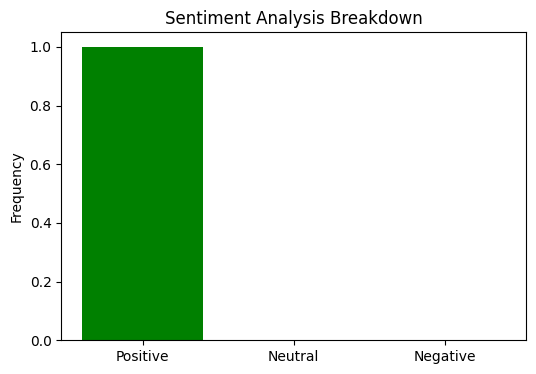

Current Sentiment: Positive
Insight: You're doing great! Keep going!
Feedback: Keep going!
Results saved to CSV.

CSV File Output (results.csv):
+-------------------------+-----------+----------+--------------+
|    Transcribed Text     | Sentiment | Polarity | Subjectivity |
+-------------------------+-----------+----------+--------------+
| this project is so cool | Positive  |   0.35   |     0.65     |
+-------------------------+-----------+----------+--------------+

New Speech Input:
Calibrating for background noise... Please wait.
Listening... Speak now!
Processing...
Speech not recognized.
No input detected. Exiting.


In [5]:
import speech_recognition as sr
from nltk.corpus import stopwords
import nltk
import re
import csv
from tabulate import tabulate
import matplotlib.pyplot as plt
from termcolor import colored  # Import termcolor for color output
from fpdf import FPDF


nltk.download('stopwords')  # Download NLTK stopwords list


# Function: Speech-to-Text Conversion
def speech_to_text():
    recognizer = sr.Recognizer()
    with sr.Microphone() as source:
        print("Calibrating for background noise... Please wait.")
        recognizer.adjust_for_ambient_noise(source)  # Noise reduction
        print("Listening... Speak now!")
        audio = recognizer.listen(source)  # Capture audio input

    try:
        print("Processing...")
        text = recognizer.recognize_google(audio)  # Google Speech API for transcription
        print(f"Transcribed Text: {colored(text, 'cyan')}")
        return text
    except sr.UnknownValueError:
        print("Speech not recognized.")
        return None
    except sr.RequestError:
        print("Google API is not reachable. Check your connection.")
        return None


# Function: Manual Sentence Tokenization
def tokenize_sentences(text):
    # Use regex to split text into sentences
    sentences = re.split(r'(?<=[.!?])\s+', text)
    return sentences


# Function: Preprocess Transcribed Text
def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    text = text.lower()  # Lowercase the text

    # Manual word tokenization (split on non-alphabetic characters)
    words = re.findall(r'\b[a-z]+\b', text)

    # Stop word removal and lemmatization
    clean_words = [word for word in words if word not in stop_words]
    clean_text = " ".join(clean_words)
    print(f"Preprocessed Text: {colored(clean_text, 'yellow')}")
    return clean_text

# Emotion detection
def categorize_emotion(polarity):
    if polarity > 0.5:
        return "😄 Happy"
    elif polarity > 0:
        return "😊 Positive"
    elif polarity < -0.5:
        return "😠 Angry"
    elif polarity < 0:
        return "😞 Sad"
    else:
        return "😐 Neutral"


# Analyze sentiment
def analyze_sentiment(text):
    from textblob import TextBlob  # Import here for minimal dependency usage

    blob = TextBlob(text)
    polarity = blob.sentiment.polarity  # Polarity score
    subjectivity = blob.sentiment.subjectivity
    
    # Categorize emotion
    emotion = categorize_emotion(polarity)

    # Classify sentiment
    if polarity > 0:
        sentiment = "Positive"
    elif polarity < 0:
        sentiment = "Negative"
    else:
        sentiment = "Neutral"

    # Print sentiment and emotion with color
    if sentiment == "Positive":
        sentiment_colored = colored(f"Sentiment: {sentiment} {emotion} (Polarity: {polarity}, Subjectivity: {subjectivity})", 'green')
    elif sentiment == "Negative":
        sentiment_colored = colored(f"Sentiment: {sentiment} {emotion} (Polarity: {polarity}, Subjectivity: {subjectivity})", 'red')
    else:
        sentiment_colored = colored(f"Sentiment: {sentiment} {emotion} (Polarity: {polarity}, Subjectivity: {subjectivity})", 'yellow')

    print(sentiment_colored)

    # Visualization
    sentiment_labels = ['Positive', 'Neutral', 'Negative']
    sentiment_values = [0, 0, 0]
    
    if polarity > 0:
        sentiment_values[0] += 1
    elif polarity < 0:
        sentiment_values[2] += 1
    else:
        sentiment_values[1] += 1

    plt.figure(figsize=(6, 4))
    plt.bar(sentiment_labels, sentiment_values, color=['green', 'gray', 'red'])
    plt.title("Sentiment Analysis Breakdown")
    plt.ylabel("Frequency")
    plt.show()
    return sentiment, polarity, subjectivity

def provide_detailed_insight(text):
    # Simple keyword-based insights
    keywords_to_advice = {
        "stress": "Take a break, breathe deeply, and relax.",
        "excited": "That's great! Keep up the energy!",
        "angry": "Try to calm down with some breathing exercises.",
        "sad": "It's okay to feel sad. Try to talk to a friend or take a short walk."
    }

    # Search for keywords and return corresponding advice
    for keyword, advice in keywords_to_advice.items():
        if keyword in text.lower():
            return advice
    return "You're doing great! Keep going!"

def provide_emotion_feedback(sentiment):
    feedback = {
        "Happy": "You're in a great mood! Keep it up!",
        "Sad": "It's okay to feel sad. Take a moment for yourself.",
        "Angry": "Try to calm down with deep breaths or a short break.",
        "Neutral": "It seems balanced. Keep going!"
    }
    
    return feedback.get(sentiment, "Keep going!")




# Function: Save Results to CSV
def save_to_csv(text, sentiment, polarity, subjectivity, filename="results.csv"):
    with open(filename, "a", newline="") as file:
        writer = csv.writer(file)
        writer.writerow([text, sentiment, polarity, subjectivity])
    print("Results saved to CSV.")
    
    
# Function: Print CSV Output as a Table using tabulate
def print_csv_table(filename="results.csv"):
    # Read the CSV file
    with open(filename, "r") as file:
        reader = csv.reader(file)
        rows = list(reader)

    # Header for the table
    headers = ["Transcribed Text", "Sentiment", "Polarity", "Subjectivity"]

    # Print the CSV file content in a formatted table
    print("\nCSV File Output (results.csv):")
    print(tabulate(rows, headers=headers, tablefmt="pretty"))



# Main Program: Combine All Steps in a Loop
if __name__ == "__main__":
    print("Starting Speech-to-Text Sentiment Analysis...")

    # Loop to handle multiple speech inputs
    while True:
        print("\nNew Speech Input:")
        text = speech_to_text()  # Step 1: Speech Recognition
        if text:  # Proceed if transcription was successful
            sentences = tokenize_sentences(text)  # Step 2a: Tokenize sentences
            print(f"Tokenized Sentences: {colored(str(sentences), 'cyan')}")
            
            for sentence in sentences:  # Process each sentence individually
                clean_text = preprocess_text(sentence)  # Step 2b: Preprocessing
                sentiment, polarity, subjectivity = analyze_sentiment(clean_text)  # Step 3: Sentiment Analysis
                print(f"Current Sentiment: {colored(sentiment, 'magenta')}")  # Display real-time sentiment
            
                # Provide insight based on sentiment
                insight = provide_detailed_insight(sentiment)
                print(f"Insight: {colored(insight, 'blue')}")  # Display sentiment insight
                
                # Provide insight based on sentiment
                emotion = provide_emotion_feedback(sentiment)
                print(f"Feedback: {colored(emotion, 'blue')}")  # Display emotion feedback

                save_to_csv(sentence, sentiment, polarity, subjectivity)  # Step 4: Save to CSV
                print_csv_table()  # Print the CSV as a table after each input
        else:
            print("No input detected. Exiting.")
            break  # Exit loop if no text is transcribed


In [5]:
import tkinter as tk
from tkinter import messagebox

# GUI-based speech sentiment analysis
def run_speech_analysis():
    text = speech_to_text()
    if text:
        clean_text = preprocess_text(text)
        sentiment, polarity, subjectivity = analyze_sentiment(clean_text)
        save_to_csv(text, sentiment, polarity, subjectivity)
        
        # Show results in a popup
        result = f"Sentiment: {sentiment}\nPolarity: {polarity:.2f}\nSubjectivity: {subjectivity:.2f}"
        messagebox.showinfo("Analysis Result", result)
    else:
        messagebox.showerror("Error", "No speech detected!")

# UI Design
root = tk.Tk()
root.title("Speech Sentiment Analysis")
root.geometry("400x300")

label = tk.Label(root, text="Speech Sentiment Analysis Tool", font=("Arial", 16))
label.pack(pady=20)

start_button = tk.Button(root, text="Start Analysis", command=run_speech_analysis, font=("Arial", 14), bg="lightblue")
start_button.pack(pady=10)

exit_button = tk.Button(root, text="Exit", command=root.destroy, font=("Arial", 14), bg="red")
exit_button.pack(pady=10)


root.mainloop()
